# Hello Computer Vision world

Let's try to learn a bit about computer vision.

In [2]:
import cv2 #import openCV library
import matplotlib.pyplot as plt
import numpy as np

import os

In [6]:
os.chdir('/home/armanubuntu/computer-vision-stuff/computer-vision-stuff')

Load and visualize an image:

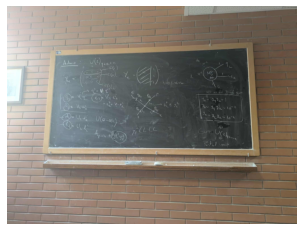

In [ ]:
img = cv2.imread('lastmeeting.jpg')

#print(img) # prints the array representation of the image; each pixel is represented by 3 values (BGR).
# The image itself you get a NumPy array — shape (height, width, 3) for a color image. Each pixel has 3 intensity values (one per color channel).

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cvtColor stands for Convert Color, from BGR to RGB, as OpenCV uses BGR by default, but matplotlib uses RGB
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Play with transformations:

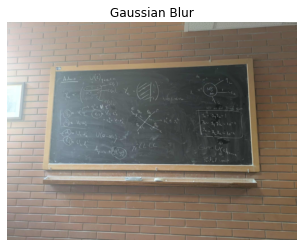

In [26]:
blur = cv2.GaussianBlur(img_rgb, (5,5), 0)
plt.imshow(blur)
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()

The blur option applies a Gaussian filter - a smoothing operation that reduces image noise and detail. \
Each pixel is replaced by a weighted average of its neighbors, where nearby pixels count more than the distant ones. The weights come from a Gaussian. \
The (5,5) represents the size of the kernel; i.e. a 5x5 pixel neighborhood is taken. \
The 0 represents the value of $\sigma$ of the Gaussian, but if $\sigma = 0$ then openCV computes $\sigma$ automatically from the kernel size.

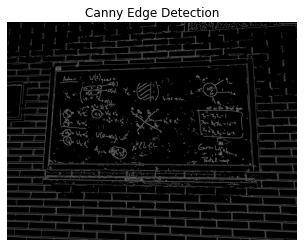

In [28]:
edges = cv2.Canny(blur, 40, 50) # Canny Edge Detection on the blurred image. The two values are the min and max thresholds for edge detection

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edge Detection')
plt.show()

This finds the edges (boundaries of objects) in an image — points where the brightness changes sharply. \
The output is a binary image (black–white): \
White pixels → detected edges. \
Black pixels → everything else. 

The first number is the	lower threshold for edge detection, and the second is the upper threshold. \
The thresholds control sensitivity: \
Lower → detect more (including faint) edges. \
Higher → detect only strong edges. 


The Canny algorithm actually performs five steps under the hood: 
+ Noise reduction using Gaussian blur
(That’s why we often do the blur manually first — to control it).

+ Gradient computation — measures how fast intensity changes in x/y directions.

+ Edge strength & direction — combine gradients into a single “magnitude” image.

+ Non-maximum suppression — thins wide edges to a single pixel line.

+ Hysteresis thresholding — uses the two thresholds to decide which gradients are “real edges”.

🧪 Visual demo: Effect of blurring on edge detection

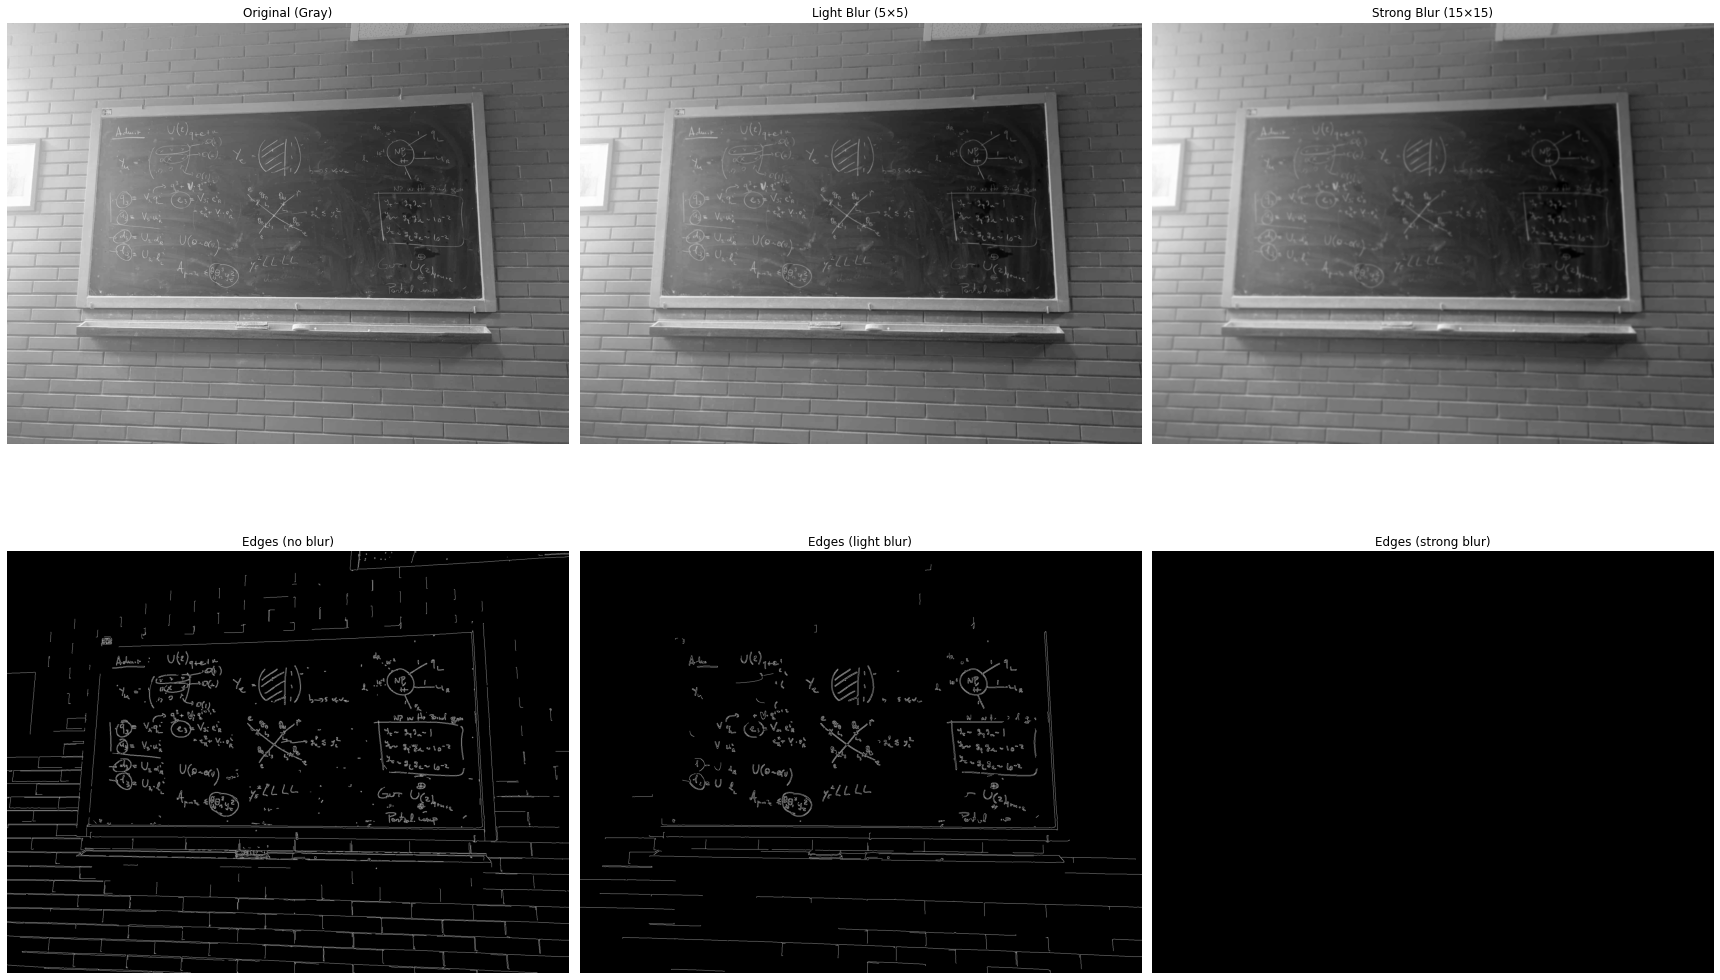

In [31]:
# 1. Read and convert to grayscale
img_bgr = cv2.imread(cv2.samples.findFile("lastmeeting.jpg"))  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2. Apply different amounts of blur
blur_none = gray
blur_light = cv2.GaussianBlur(gray, (5,5), 0)
blur_strong = cv2.GaussianBlur(gray, (15,15), 0)

# 3. Run Canny edge detection on each version
edges_none = cv2.Canny(blur_none, 100, 200)
edges_light = cv2.Canny(blur_light, 100, 200)
edges_strong = cv2.Canny(blur_strong, 100, 200)

# 4. Show results
fig, axs = plt.subplots(2, 3, figsize=(24,16))
axs = axs.ravel()

titles = [
    "Original (Gray)", "Light Blur (5×5)", "Strong Blur (15×15)",
    "Edges (no blur)", "Edges (light blur)", "Edges (strong blur)"
]
images = [gray, blur_light, blur_strong,
           edges_none, edges_light, edges_strong]

for ax, img, title in zip(axs, images, titles):
    cmap = 'gray' if len(img.shape)==2 else None
    ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


In the no-blur version, edges are noisy and fragmented — you’ll see spurious white lines from texture or small shadows.\
With light blur (5×5), the edges become cleaner and more continuous.\
With too strong blur (15×15), edges start to fade or disappear — fine detail is lost.\
So there’s a sweet spot: just enough smoothing to remove noise, but not so much that you erase structure.
This picture is maybe not the best example but okay! Very interesting to see. 

So the combination of Blur + Canny algorithm is the basic thing done in CV.

Some other things one can do:

| Function             | Meaning                          | Notes                              |
| -------------------- | -------------------------------- | ---------------------------------- |
| `cv2.imread()`       | Loads image in BGR order         | Returns NumPy array                |
| `cv2.cvtColor()`     | Converts color spaces            | Required for correct visualization |
| `cv2.COLOR_BGR2RGB`  | Swaps red and blue channels      | Use before Matplotlib display      |
| `cv2.COLOR_BGR2GRAY` | Makes image grayscale            | Used for detection tasks           |
| `cv2.COLOR_BGR2HSV`  | Converts to Hue–Saturation–Value | Good for color filtering           |


## Other important concepts:

### Thresholding - separating objects from background

It is basically building a mask on a grayscale image, and putting to "white" every pixel that is brighter than the reference value, and putting to "black" every pixel that is darker than the reference value.

In [32]:
img_bgr = cv2.imread("lena.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) # Convert RGB to Grayscale

_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY) #128 is the threshold value; 255 is the max value to use with THRESH_BINARY

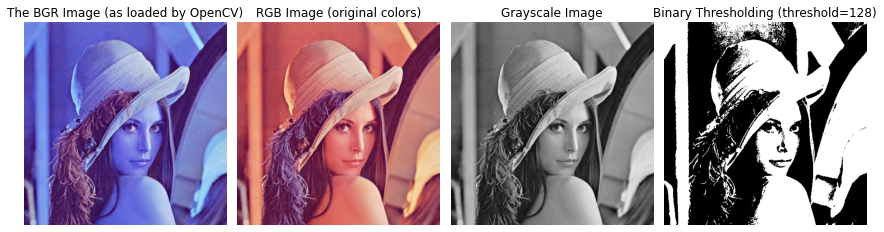

In [33]:
fig, ax = plt.subplots(1,4,figsize=(12,6))
#plt.imshow(binary) - this would show a colored version, which is not what we want
ax[0].imshow(img_bgr)
ax[0].set_title('The BGR Image (as loaded by OpenCV)')
ax[0].axis('off')
ax[1].imshow(img_rgb)
ax[1].set_title('RGB Image (original colors)')
ax[1].axis('off')
ax[2].imshow(img_gray, cmap='gray')
ax[2].set_title('Grayscale Image')
ax[2].axis('off')
ax[3].imshow(binary, cmap='gray')
ax[3].set_title('Binary Thresholding (threshold=128)')
ax[3].axis('off')

plt.tight_layout()
plt.show()


cv2.THRESH_BINARY_INV → inverted \
cv2.adaptiveThreshold() → computes local thresholds (good for uneven lighting).

### Morphological Operations - Clean up binary images

Morphological ops fix potential small "holes" or "specks" using simple geometry on pixels. The operations are called: \
- Erosion: Shrinks white regions (useful to remove small noise)
- Dilation: Expands white regions (fills gaps)
- Opening: Erosion -> Dilation (remove noise)
- Closing: Dilation -> Erosion (fill holes)

In [34]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

<h6> 
The kernel (structuring element) is the small binary mask that OpenCV slides over the image for morphological ops. 

np.ones((5,5), np.uint8) creates a 5×5 square structuring element of ones (uint8), so:

Role: defines the neighborhood and shape used for erosion/dilation (and thus opening = erosion then dilation)

Values: 1 = pixel included, 0 = ignored. Non-zero entries are the shape that interacts with the image.

Size effect: larger kernels remove/alter larger features (remove bigger noise, erode objects more); smaller kernels preserve fine detail

Shape effect: square (np.ones) treats all directions equally; using an ellipse or cross changes how corners / thin structures are handled

dtype: OpenCV expects a uint8 mask (non-zero values are treated as “on”).



Other examples:

5x5 square (as used)
kernel = np.ones((5,5), np.uint8)

3x3 cross
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

7x7 ellipse
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))


Guideline: choose kernel shape/size relative to the scale of the noise or gaps you want to remove/fill. Odd sizes are common so the kernel has a center (anchor).

</h6>


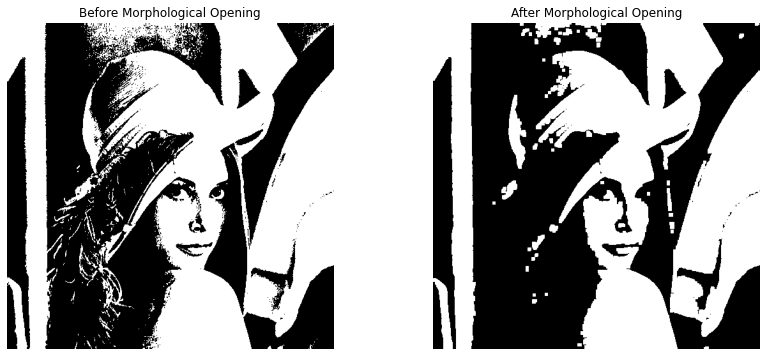

In [35]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].imshow(binary, cmap='gray')
ax[0].set_title('Before Morphological Opening')
ax[0].axis('off')
ax[1].imshow(opening, cmap='gray')
ax[1].set_title('After Morphological Opening')
ax[1].axis('off')
plt.show()

It "roughens" the picture, solidifies the structures! 

### Contours - finding object outlines

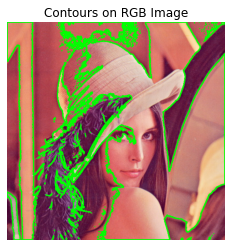

In [ ]:
contours, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_rgb, contours, -1, (0,255,0), 2)
plt.imshow(img_rgb)
plt.title('Contours on RGB Image')
plt.axis('off')
plt.show()

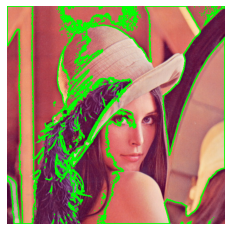

In [37]:
# recommended robust call (works across OpenCV versions)
found = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(found) == 3:
    _, contours, hierarchy = found
else:
    contours, hierarchy = found

# draw all contours
cv2.drawContours(img_rgb, contours, -1, (0,255,0), 2)
plt.imshow(img_rgb); plt.axis('off'); plt.show()

<h6> 
Arguments in cv2.findContours()

 1) image: single-channel binary (uint8) image (usually result of threshold/Canny). Note: findContours modifies the image, so pass a copy (e.g. binary.copy()).

2) mode: contour retrieval mode:
- cv2.RETR_EXTERNAL — only outermost contours
- cv2.RETR_LIST — all contours, no hierarchy
- cv2.RETR_CCOMP — 2-level hierarchy (outer + holes)
- cv2.RETR_TREE — full hierarchical tree (parents/children)

3) method: contour approximation:
- cv2.CHAIN_APPROX_NONE — store all contour points
- cv2.CHAIN_APPROX_SIMPLE — compress straight segments (keeps endpoints) — most common and compact
- other TC89 methods for different approximations

Return values (Python / OpenCV version caveat)

- contours — list of NumPy arrays, each array is an Nx1x2 or Nx2 array of (x,y) points describing a contour

- hierarchy — array of shape (num_contours, 4) with [next, previous, first_child, parent] indices (or None if no hierarchy)

- Note: OpenCV Python return ordering varies by version. Use a safe unpacking pattern like above.
</h6>

#### Different contour retrieval modes

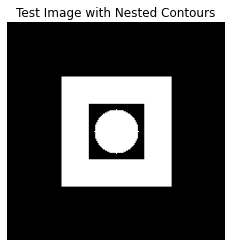

In [44]:
def show_contours_with_mode(img, mode, title):
    found = cv2.findContours(img.copy(), mode, cv2.CHAIN_APPROX_SIMPLE)
    contours = found[1] if len(found) == 3 else found[0]
    
    # Draw on white background for visibility
    result = np.ones_like(img) * 255
    cv2.drawContours(result, contours, -1, (0,0,0), 2)
    return result

# Create a test image with nested contours
img = np.zeros((200,200), dtype=np.uint8)
cv2.rectangle(img, (50,50), (150,150), 255, -1)  # Outer square
cv2.rectangle(img, (75,75), (125,125), 0, -1)    # Inner hole
cv2.circle(img, (100,100), 20, 255, -1)          # Circle inside hole

# Compare modes
modes = [
    (cv2.RETR_EXTERNAL, "EXTERNAL - only outer contours"),
    (cv2.RETR_LIST, "LIST - all contours, no hierarchy"),
    (cv2.RETR_CCOMP, "CCOMP - 2-level hierarchy"),
    (cv2.RETR_TREE, "TREE - full hierarchy")
]

plt.imshow(img, cmap='gray')
plt.title('Test Image with Nested Contours')
plt.axis('off')
plt.show()


The different contour tracking modes in action:

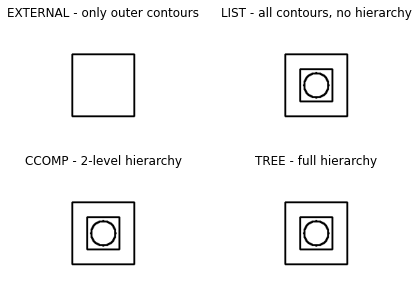

In [48]:
fig, axs = plt.subplots(2,2, figsize=(7,5))
for ax, (mode, title) in zip(axs.ravel(), modes):
    result = show_contours_with_mode(img, mode, title)
    ax.imshow(result, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

<h6> 

Understanding Hierarchy

The hierarchy array contains 4 values for each contour: [Next, Previous, First_Child, Parent]

- Next: Index of next contour at same level
- Previous: Index of previous contour at same level
- First_Child: Index of first child contour
- Parent: Index of parent contour


These terms have actually an intuitive relationship. For example, the parent-child refers to contours being completely inside another one, whereas next/previous refers to contours at the same hierarchical level (siblings, two children of the same parent). 
The area can also be calculated (and is literally the area inside, measured in pixels^2). For the relationships between the contours, if we have -1, that means "no relationship", any non-negative number refers to the contour number. They're labeled from 0 to N. See the blocks of code below to understand it.
 
</h6>



In [ ]:
# Example showing hierarchy relationships for our test image with nested contours above
def print_hierarchy(contours, hierarchy):
    print("Contour\tNext\tPrev\tChild\tParent")
    print("-" * 40)
    for i, h in enumerate(hierarchy[0]):
        area = cv2.contourArea(contours[i])
        print(f"{i}\t{h[0]}\t{h[1]}\t{h[2]}\t{h[3]}\t(area: {area:.0f})")

# Using previous image
found = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = found[1] if len(found) == 3 else found[0]
hierarchy = found[2] if len(found) == 3 else found[1]

print_hierarchy(contours, hierarchy)

Contour	Next	Prev	Child	Parent
----------------------------------------
0	-1	-1	1	-1	(area: 10000)
1	-1	-1	2	0	(area: 2702)
2	-1	-1	-1	1	(area: 1200)


An even simpler case:

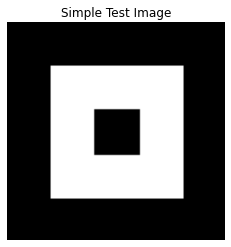

Contour	Next	Prev	Child	Parent
----------------------------------------
0	-1	-1	1	-1	(area: 3600)
1	-1	-1	-1	0	(area: 482)


In [49]:
# Create a simpler test image
test = np.zeros((100,100), dtype=np.uint8)
cv2.rectangle(test, (20,20), (80,80), 255, -1)  # Outer square
cv2.rectangle(test, (40,40), (60,60), 0, -1)    # Inner hole

plt.imshow(test, cmap='gray')
plt.title('Simple Test Image')
plt.axis('off')
plt.show()

found = cv2.findContours(test.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = found[1] if len(found) == 3 else found[0]
hierarchy = found[2] if len(found) == 3 else found[1]

print_hierarchy(contours, hierarchy)

#### Filtering the contours

We can filter out contours based on their area, the arc length, the number of vertices, aspect ratio. Find the examples below

In [50]:
def filter_contours(contours):
    filtered = []
    for cnt in contours:
        # Filter by area
        area = cv2.contourArea(cnt)
        if area < 100:  # Minimum area threshold
            continue
            
        # Filter by approximation
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02*perimeter, True) 
        # Approximate contour shape. The 0.02 factor can be adjusted. 
        #approxPolyDP is used to approximate the contour to a simpler shape.

        # Filter by number of vertices
        if len(approx) < 4 or len(approx) > 10:
            continue
            
        # Filter by aspect ratio
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        if aspect_ratio < 0.2 or aspect_ratio > 5:
            continue
            
        filtered.append(cnt)
    return filtered

# Example usage:
filtered_contours = filter_contours(contours)

The approxPolyDP is basically a way of approximating complicated polygonal shapes with simpler ones.
The algorithm goes like this:

For a curve $C$ defined by points $[p_1, p_2, \ldots, p_n]$:
1. Connect first and last point with line $L$
2. Find point $p_i$ farthest from $L$
3. If $\mathrm{dist.}(p_i, L) \leq \varepsilon$:\
       Approximate curve with $L$\
   Else:\
       Recursively approximate subcurves $[p_1, \ldots, p_i]$ and $[p_i, \ldots, p_n]$

Original array:
 [[100 100]
 [120  80]
 [140 100]
 [160  80]
 [180 100]
 [160 120]
 [180 140]
 [140 120]
 [120 140]
 [100 120]]
Contour shape: (10, 1, 2)
[[[100 100]]

 [[120  80]]

 [[140 100]]

 [[160  80]]

 [[180 100]]

 [[160 120]]

 [[180 140]]

 [[140 120]]

 [[120 140]]

 [[100 120]]]
Original contour points: 10
Approximated contour points: 5


(-0.5, 199.5, 199.5, -0.5)

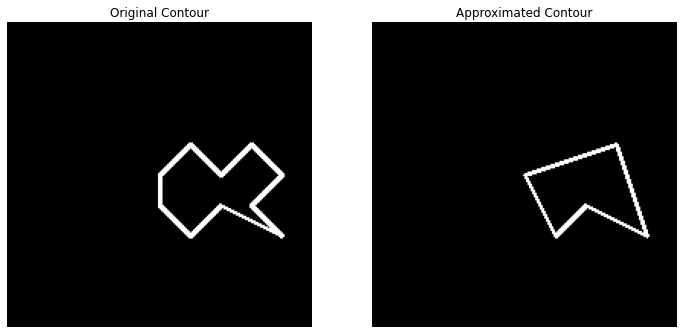

In [ ]:
# Create a sample contour (let's say we have a complex shape)
contour = np.array([[100,100], [120,80], [140,100], [160,80], [180,100], 
                    [160,120], [180,140], [140,120], [120,140], [100,120]], dtype=np.int32)

print("Original array:\n", contour)  # Should be (N, 2)
contour = contour.reshape((-1,1,2))  # Reshape to format OpenCV expects. OpenCV expects contours in the shape (N, 1, 2) where N is the number of points. The middle 1 is for compatibility with OpenCV's contour representation. -1 infers the number of points automatically.
print(f"Contour shape: {contour.shape}")  # Should be (N, 1, 2)
print(contour)

# Calculate the perimeter
perimeter = cv2.arcLength(contour, True)

# Approximate the contour
epsilon = 0.05 * perimeter  # 5% of perimeter
approx = cv2.approxPolyDP(contour, epsilon, True)

print(f"Original contour points: {len(contour)}")
print(f"Approximated contour points: {len(approx)}")

# Create two separate images to show the contours clearly
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Draw original contour
img1 = np.zeros((200,200), dtype=np.uint8)
cv2.drawContours(img1, [contour], -1, (255,255,255), 2)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Original Contour')
ax1.axis('off')

# Draw approximated contour
img2 = np.zeros((200,200), dtype=np.uint8)
cv2.drawContours(img2, [approx], -1, (255,255,255), 2)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Approximated Contour')
ax2.axis('off')

We can play a bit with the values of $\varepsilon$:

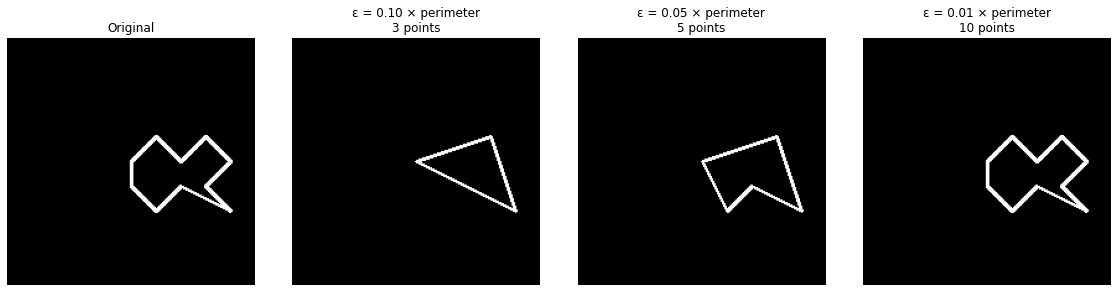

In [60]:
# Create a sample contour
contour = np.array([[100,100], [120,80], [140,100], [160,80], [180,100], 
                    [160,120], [180,140], [140,120], [120,140], [100,120]], dtype=np.int32)
contour = contour.reshape((-1,1,2))

# Test different epsilon values
perimeter = cv2.arcLength(contour, True)
epsilons = [0.1, 0.05, 0.01]  # 10%, 5%, 1% of perimeter

fig, axes = plt.subplots(1, len(epsilons)+1, figsize=(16,4))
# Original
axes[0].imshow(cv2.drawContours(np.zeros((200,200), dtype=np.uint8), 
                               [contour], -1, 255, 2), cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Approximations
for i, eps in enumerate(epsilons, 1):
    epsilon = eps * perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    img = np.zeros((200,200), dtype=np.uint8)
    cv2.drawContours(img, [approx], -1, 255, 2)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'ε = {eps:.2f} × perimeter\n{len(approx)} points')
    axes[i].axis('off')

plt.tight_layout()
plt.show()